In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

from constants import numeric_columns as num_cols
from constants import *

#sono in constants ma è come in certi casi se non li leggesse se non sono qua
train_df = pd.read_csv('dm1_dataset_2425_imdb/train.csv')
test_df = pd.read_csv('dm1_dataset_2425_imdb/test.csv')

In [70]:
for col in num_cols:
    train_df[col] = pd.to_numeric(train_df[col], errors='coerce')
# train_df[num_cols] = pd.to_numeric(train_df[num_cols], errors='coerce')

train_df.loc[train_df['genres'] == r'\N', 'genres'] = np.nan
train_df

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,NaN,NaN,0.0,779,1,10,1,...,tvEpisode,0,False,True,0,1,0,781,['US'],"Action,Adventure,Animation"
1,Looping,"(5, 6]",1982,NaN,NaN,0.0,11,1,10,1,...,videoGame,0,False,True,0,1,0,11,['XWG'],Action
2,Idealnaya para,"(5, 6]",1992,NaN,NaN,0.0,38,1,10,1,...,movie,0,False,True,0,1,1,38,['RU'],Comedy
3,MasterChef Celebrity México,"(5, 6]",2021,NaN,NaN,0.0,15,1,10,22,...,tvSeries,0,True,True,0,1,0,15,['MX'],Reality-TV
4,Seutateueob,"(7, 8]",2020,2020.0,80.0,1.0,15718,1,10,347,...,tvSeries,1,True,True,0,32,452,15746,['KR'],"Comedy,Drama,Romance"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16426,Caprices,"(5, 6]",1942,NaN,NaN,0.0,73,1,10,4,...,movie,0,False,True,0,14,4,73,['FR'],Comedy
16427,Haar Jeet,"(4, 5]",1990,NaN,NaN,0.0,15,1,10,2,...,movie,0,False,True,0,1,1,15,['IN'],"Action,Drama,Thriller"
16428,Kotigobba 3,"(5, 6]",2021,NaN,140.0,0.0,2560,1,10,39,...,movie,5,False,True,0,5,49,2560,['IN'],"Action,Drama,Romance"
16429,Ator l'invincibile,"(3, 4]",1982,NaN,NaN,0.0,3011,1,10,52,...,movie,0,False,True,0,26,58,3012,['IT'],"Action,Adventure,Fantasy"


In [71]:
train_df.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,NaN,NaN,0.0,779,1,10,1,...,tvEpisode,0,False,True,0,1,0,781,['US'],"Action,Adventure,Animation"
1,Looping,"(5, 6]",1982,NaN,NaN,0.0,11,1,10,1,...,videoGame,0,False,True,0,1,0,11,['XWG'],Action
2,Idealnaya para,"(5, 6]",1992,NaN,NaN,0.0,38,1,10,1,...,movie,0,False,True,0,1,1,38,['RU'],Comedy
3,MasterChef Celebrity México,"(5, 6]",2021,NaN,NaN,0.0,15,1,10,22,...,tvSeries,0,True,True,0,1,0,15,['MX'],Reality-TV
4,Seutateueob,"(7, 8]",2020,2020.0,80.0,1.0,15718,1,10,347,...,tvSeries,1,True,True,0,32,452,15746,['KR'],"Comedy,Drama,Romance"


# FIG.1(b)
### counting of ratings frequencies

<Axes: xlabel='rating'>

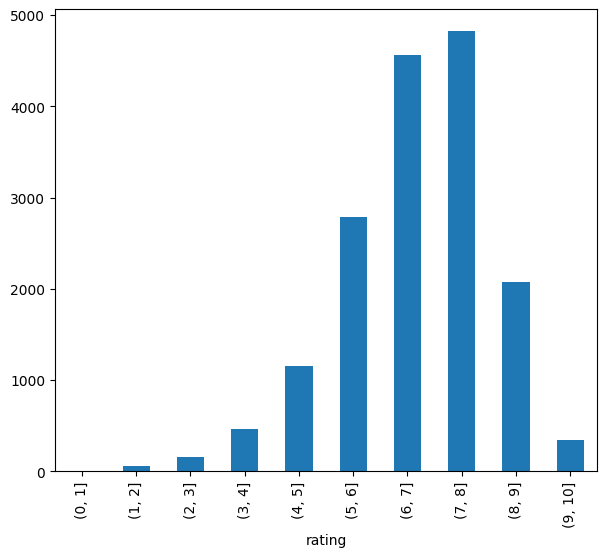

In [72]:
plt.figure(figsize = (7, 6))


grouped_ratings = train_df.groupby('rating').count()
grouped_ratings['originalTitle'].plot(kind= 'bar')


#plt.savefig('C:\\Users\\Gagia\\Desktop\\progetto DM\\report_data_semantics\\plots\\fig1_b.png')

# FIG.1(a)
### counting of the title types frequencies combined with the canHaveEpisodes variable

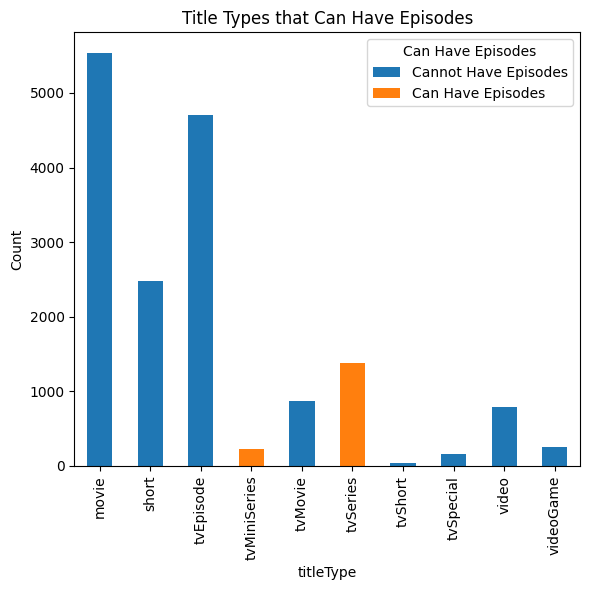

In [73]:
#qunidi plottare canHaveEpisodes e titletype insieme
train_df["titleType"].unique()
counts = train_df.groupby(['titleType', 'canHaveEpisodes']).size().unstack(fill_value=0)

counts.plot(kind='bar', stacked=True,  figsize=(6, 6))
#plt.savefig('C:\\Users\\Gagia\\Desktop\\progetto DM\\report_data_semantics\\plots\\fig1_a.png')

plt.xlabel('titleType')
plt.ylabel('Count')
plt.title('Title Types that Can Have Episodes')
plt.legend(['Cannot Have Episodes', 'Can Have Episodes'], title='Can Have Episodes')
plt.tight_layout()
plt.show()



In [74]:
counts

canHaveEpisodes,False,True
titleType,,
movie,5535,0
short,2474,0
tvEpisode,4698,0
tvMiniSeries,0,224
tvMovie,868,0
tvSeries,0,1375
tvShort,40,0
tvSpecial,166,0
video,792,0


# FIG.1(c)
### counting of the adult and non-adult frequencies combined with the isRatable attribute

In [75]:
#IsRatable or not -> abbiamo notato che sono tutti Ratable
grouped_ratable = train_df.groupby('isRatable').count()
grouped_ratable["originalTitle"]

isRatable
True    16431
Name: originalTitle, dtype: int64

<Axes: xlabel='isAdult'>

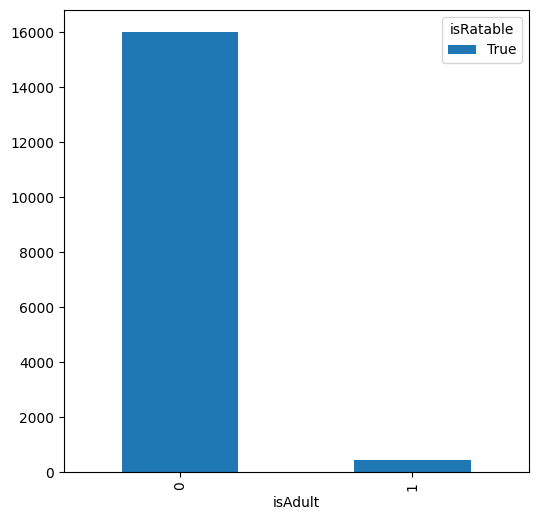

In [76]:
grouped_adult = train_df.groupby('isAdult').count()

x = train_df.groupby(['isAdult', 'isRatable']).size().unstack(fill_value=0)
x.plot(kind='bar', stacked=True,  figsize=(6, 6))
#plt.savefig('C:\\Users\\Gagia\\Desktop\\progetto DM\\report_data_semantics\\plots\\fig1_c.png')

In [77]:
grouped_adult

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,criticReviewsTotal,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
isAdult,,,,,,,,,,,,,,,,,,,,,
0,16005,16005,16005,808,11286,13461,16005,16005,16005,16005,...,16005,16005,16005,16005,16005,16005,16005,16005,16005,15634
1,426,426,426,6,293,352,426,426,426,426,...,426,426,426,426,426,426,426,426,426,415


# FIG.1(d)
### plot generi più frequenti

In [78]:
#trasformiamo paesi in liste di stringhe 
train_df['countryOfOrigin'] = train_df['countryOfOrigin'].apply(ast.literal_eval)

types = [type(v) for v in train_df['countryOfOrigin']]
print(types)

#for v in train_df["countryOfOrigin"]:
#    x = type(v)
#x


[<class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 'list'>, <class 

In [79]:
# converts into series of arrays of strings
train_df['genres'] = train_df['genres'].apply(
    lambda x: x.split(',') if isinstance(x, str) else np.nan
)


In [80]:
train_df['genres']

0        [Action, Adventure, Animation]
1                              [Action]
2                              [Comedy]
3                          [Reality-TV]
4              [Comedy, Drama, Romance]
                      ...              
16426                          [Comedy]
16427         [Action, Drama, Thriller]
16428          [Action, Drama, Romance]
16429      [Action, Adventure, Fantasy]
16430                    [Drama, Short]
Name: genres, Length: 16431, dtype: object

In [81]:
import itertools

set(itertools.chain.from_iterable(train_df.loc[~train_df['genres'].isna(), 'genres']))

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

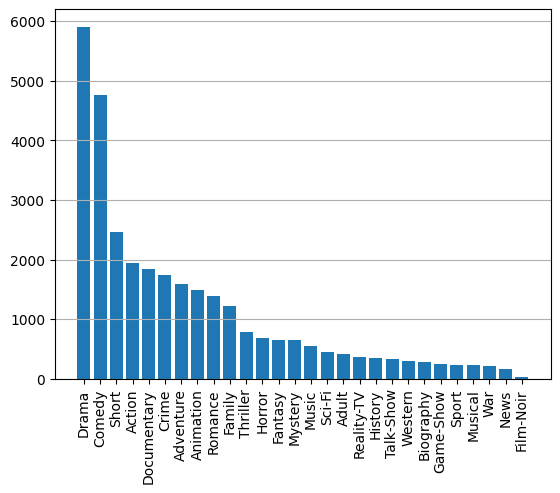

In [82]:
from collections import Counter

# for genre in itertools.chain.from_iterable(train_df.loc[~train_df['genres'].isna(), 'genres']):
genre_counts = Counter(itertools.chain.from_iterable(train_df.loc[~train_df['genres'].isna(), 'genres']))

genre_counts_df = pd.DataFrame(
        genre_counts.items(),
        columns=['Genre', 'Count']
    ).sort_values(by='Count', ascending= False)

plt.bar(x= genre_counts_df['Genre'], height= genre_counts_df['Count'],)
plt.xticks(rotation= 90)
plt.grid(axis= 'y')
# plt.yscale('log')

#insert_name
# plt.savefig('plots/insert_name.png')

  titleType    genre  count
0     movie    Drama   2559
1     movie   Comedy   1426
2     movie  Romance    681
  titleType   genre  count
3     short   Short   2205
4     short  Comedy    615
5     short   Drama    597
   titleType      genre  count
6  tvEpisode     Comedy   1918
7  tvEpisode      Drama   1870
8  tvEpisode  Adventure    916
       titleType        genre  count
9   tvMiniSeries        Drama     94
10  tvMiniSeries       Comedy     39
11  tvMiniSeries  Documentary     33
   titleType        genre  count
12   tvMovie        Drama    341
13   tvMovie  Documentary    209
14   tvMovie       Comedy    162
   titleType        genre  count
15  tvSeries       Comedy    395
16  tvSeries        Drama    373
17  tvSeries  Documentary    138
   titleType      genre  count
18   tvShort      Short     36
19   tvShort  Animation     21
20   tvShort     Comedy     11
    titleType        genre  count
21  tvSpecial       Comedy     60
22  tvSpecial        Music     48
23  tvSpecial  Doc

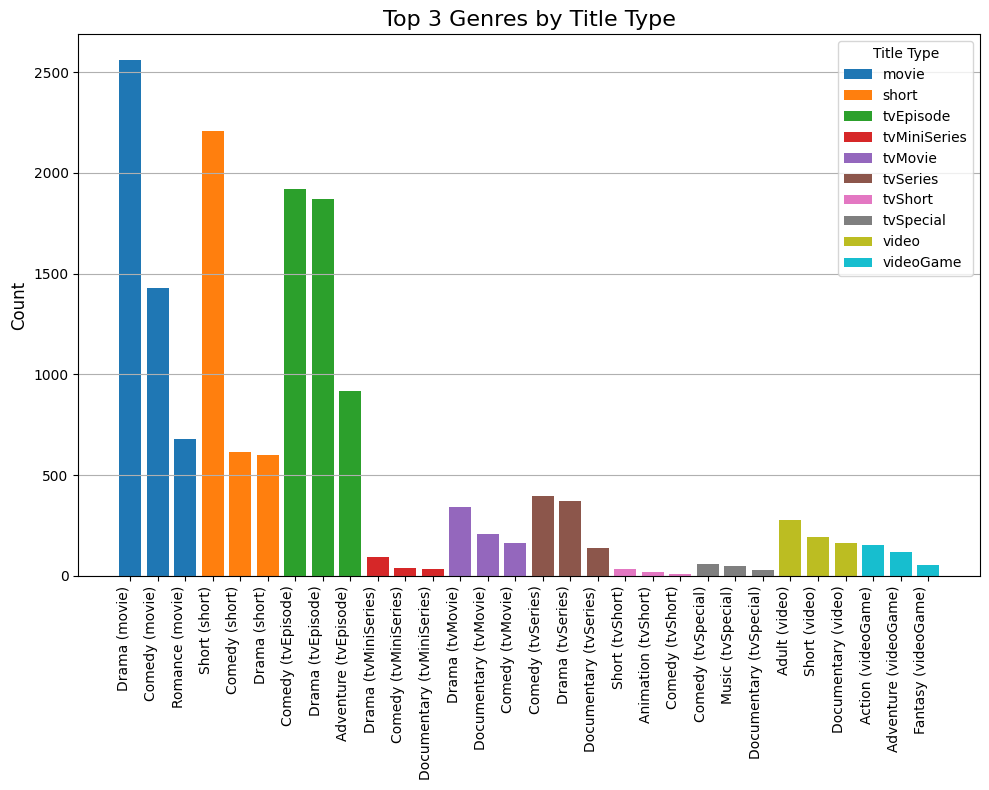

In [83]:

top_genres_by_type = {}

for title_type, group in train_df[~train_df['genres'].isna()].groupby('titleType'):
    # Flatten the genres for the current group
    flattened_genres = itertools.chain.from_iterable(group['genres'])
    
    # Count occurrences of each genre
    genre_counts = Counter(flattened_genres)
    
    # Get the top 3 genres
    top_genres = genre_counts.most_common(3)
    top_genres_by_type[title_type] = top_genres

# Convert to a DataFrame for easier visualization
plot_data = []
for title_type, genres in top_genres_by_type.items():
    for genre, count in genres:
        plot_data.append({'titleType': title_type, 'genre': genre, 'count': count})

plot_df = pd.DataFrame(plot_data)

# Plot the results
fig, ax = plt.subplots(figsize=(10, 8))
for title_type in plot_df['titleType'].unique():
    subset = plot_df[plot_df['titleType'] == title_type]
    print(subset)
    ax.bar(
        x=subset['genre'] + f" ({title_type})",  # Combine genre and titleType for clarity
        height=subset['count'],
        label=title_type
    )
    # ax.set_xticklabels(subset['genre'])

# Customize the plot
ax.set_title('Top 3 Genres by Title Type', fontsize=16)
ax.set_ylabel('Count', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.legend(title='Title Type')
#plt.yscale('log')
plt.grid(axis= 'y')
plt.tight_layout()
plt.show()
#plt.savefig('C:\\Users\\Gagia\\Desktop\\progetto DM\\report_data_semantics\\plots\\fig1_d.png')

### Unique countries -> non molto senso

In [84]:
#le unique countries sono 153 quindi forse difficile plottare per paesi
#in report a questo punto meglio mettere plot generi
import itertools

unique_countries = set(itertools.chain.from_iterable(train_df.loc[~train_df['countryOfOrigin'].isna(), 'countryOfOrigin']))
unique_countries

{'AD',
 'AE',
 'AF',
 'AL',
 'AM',
 'AO',
 'AR',
 'AT',
 'AU',
 'AZ',
 'BA',
 'BB',
 'BD',
 'BE',
 'BF',
 'BG',
 'BH',
 'BO',
 'BR',
 'BY',
 'CA',
 'CD',
 'CH',
 'CL',
 'CM',
 'CN',
 'CO',
 'CR',
 'CSHH',
 'CSXX',
 'CU',
 'CY',
 'CZ',
 'DDDE',
 'DE',
 'DK',
 'DO',
 'DZ',
 'EC',
 'EE',
 'EG',
 'EH',
 'ES',
 'ET',
 'FI',
 'FR',
 'GA',
 'GB',
 'GD',
 'GE',
 'GL',
 'GM',
 'GN',
 'GP',
 'GR',
 'GT',
 'GW',
 'GY',
 'HK',
 'HR',
 'HT',
 'HU',
 'ID',
 'IE',
 'IL',
 'IN',
 'IQ',
 'IR',
 'IS',
 'IT',
 'JM',
 'JO',
 'JP',
 'KE',
 'KG',
 'KH',
 'KP',
 'KR',
 'KW',
 'KY',
 'KZ',
 'LB',
 'LC',
 'LI',
 'LK',
 'LS',
 'LT',
 'LU',
 'LV',
 'LY',
 'MA',
 'MC',
 'ME',
 'MK',
 'ML',
 'MM',
 'MO',
 'MQ',
 'MT',
 'MX',
 'MY',
 'NA',
 'NE',
 'NG',
 'NL',
 'NO',
 'NP',
 'NZ',
 'PE',
 'PH',
 'PK',
 'PL',
 'PR',
 'PT',
 'PY',
 'QA',
 'RO',
 'RS',
 'RU',
 'RW',
 'SA',
 'SE',
 'SG',
 'SI',
 'SK',
 'SM',
 'SN',
 'SR',
 'SUHH',
 'SV',
 'SY',
 'TG',
 'TH',
 'TN',
 'TO',
 'TR',
 'TT',
 'TW',
 'UA',
 'US',
 'UY',
 'UZ'

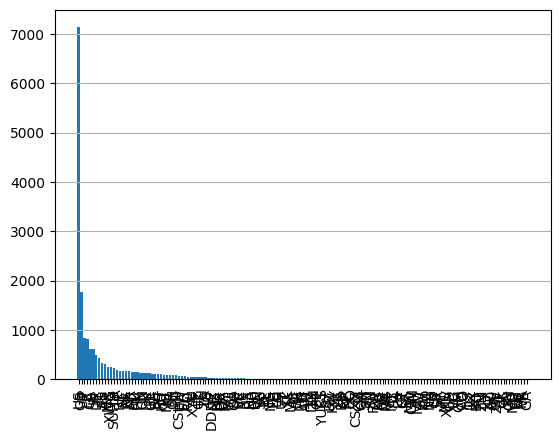

In [85]:
from collections import Counter

# for genre in itertools.chain.from_iterable(train_df.loc[~train_df['genres'].isna(), 'genres']):
countries_counts = Counter(itertools.chain.from_iterable(train_df.loc[~train_df['countryOfOrigin'].isna(), 'countryOfOrigin']))

countries_counts_df = pd.DataFrame(
        countries_counts.items(),
        columns=['Country', 'Count']
    ).sort_values(by='Count', ascending= False)

plt.bar(x= countries_counts_df['Country'], height= countries_counts_df['Count'],)
plt.xticks(rotation= 90)
plt.grid(axis= 'y')
# plt.yscale('log')

### Raggruppo per rating e titleType 

 -> vedo proporzione di title type per ogni rating

<Axes: xlabel='rating'>

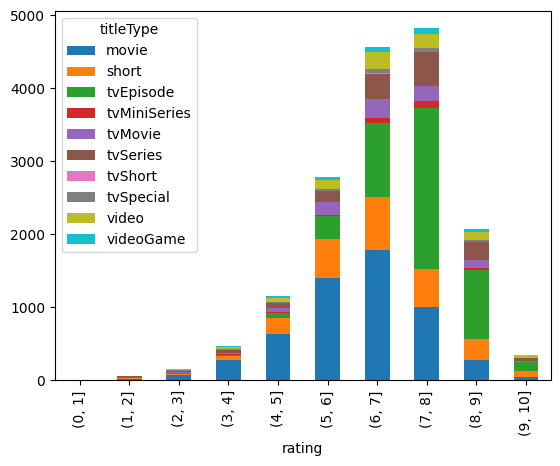

In [86]:
grouped_ratings_type = train_df.groupby(['rating',"titleType"]).size().unstack(fill_value=0)

grouped_ratings_type.plot(kind="bar", stacked=True)
#plt.savefig('plots/adult.png')

### Correlazione tra rating ricevuto e award vinti

plot che non funziona molto -> forse ci sono valori da escludere

awardWins  0.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    \
rating                                                                     
(0, 1]         3      0      0      0      0      0      0      0      0   
(1, 2]        50      0      1      0      0      0      0      0      0   
(2, 3]       121      5      0      0      0      0      0      0      0   
(3, 4]       357     17      3      1      1      2      0      0      0   
(4, 5]       900     37     14      7      2      2      2      2      0   
(5, 6]      2041    152     42     26     14      6      4      3      3   
(6, 7]      3227    300    133     58     39     27     13     17     13   
(7, 8]      3515    244    118     60     44     23      8     17     12   
(8, 9]      1507     92     38     18     15      9      8      2      1   
(9, 10]      250     13      5      3      1      5      1      2      1   

awardWins  9.0    ...  47.0   49.0   50.0   57.0   62.0   75.0   76.0   83.0   \
rating

<Axes: xlabel='rating'>

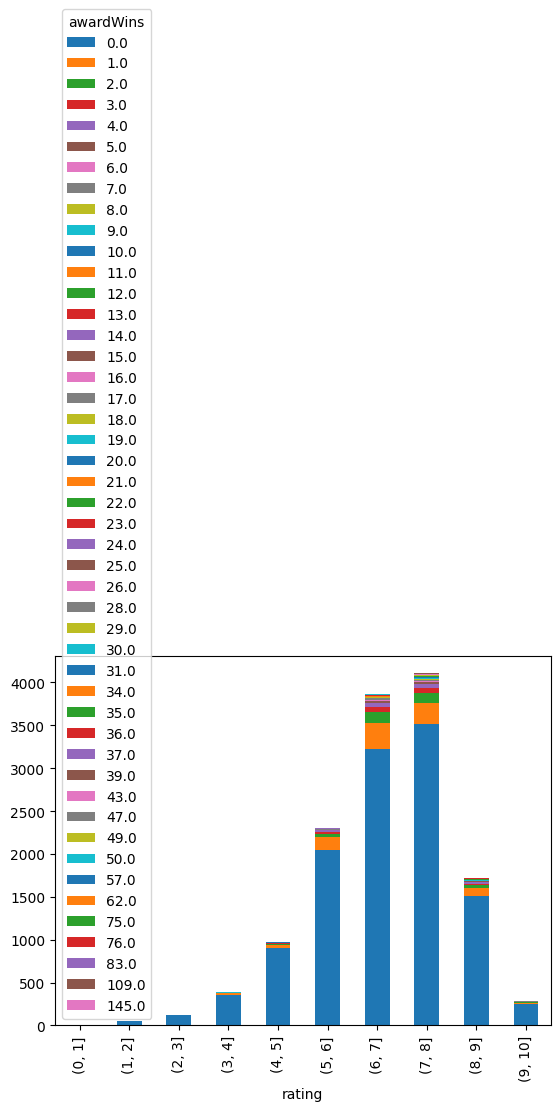

In [88]:
#grouped_ratings = train_df.groupby('rating').count() 
#grouped_awardWins = train_df.groupby('awardWins').count() 


grouped_rating_award = train_df.groupby(["rating","awardWins"]).size().unstack(fill_value=0)
print(grouped_rating_award)
#questo plot non funziona molto, forse ci sono dei valori da escludere
grouped_rating_award.plot(kind="bar", stacked=True)
#plt.savefig('plots/grouped_rating_award.png')

## CONTINUOUS ATTRIBUTES 
#### esperimenti con numeriche

In [ ]:
train_df.head()


,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,titleType,awardNominationsExcludeWins,canHaveEpisodes,isRatable,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,Neogenic Nightmare Chapter 3: Hydro-Man,"(7, 8]",1995,NaN,NaN,0.0,779,1,10,1,...,tvEpisode,0,False,True,0,1,0,781,[US],"[Action, Adventure, Animation]"
1,Looping,"(5, 6]",1982,NaN,NaN,0.0,11,1,10,1,...,videoGame,0,False,True,0,1,0,11,[XWG],[Action]
2,Idealnaya para,"(5, 6]",1992,NaN,NaN,0.0,38,1,10,1,...,movie,0,False,True,0,1,1,38,[RU],[Comedy]
3,MasterChef Celebrity México,"(5, 6]",2021,NaN,NaN,0.0,15,1,10,22,...,tvSeries,0,True,True,0,1,0,15,[MX],[Reality-TV]
4,Seutateueob,"(7, 8]",2020,2020.0,80.0,1.0,15718,1,10,347,...,tvSeries,1,True,True,0,32,452,15746,[KR],"[Comedy, Drama, Romance]"


In [47]:
#train_df.tail()

Media runtime per titletype

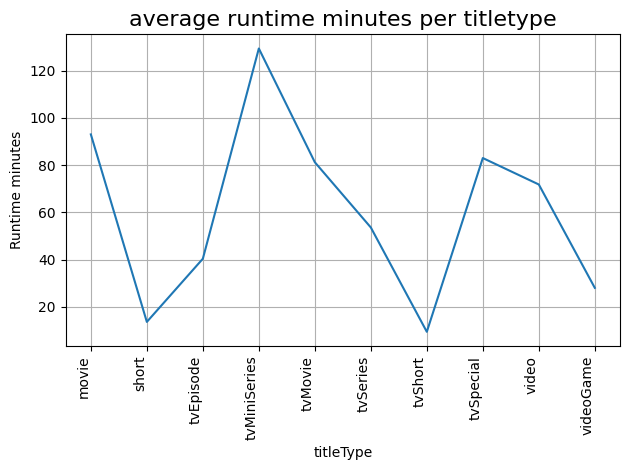

In [48]:
#da vedere questione del picco per le miniserie
#probabilmente il runtime corrisponde alla somma della durata degli episodi

x = train_df.groupby("titleType")["runtimeMinutes"].mean()
plt.plot(x)
plt.xticks(rotation=90, ha='right')
plt.title('average runtime minutes per titletype', fontsize=16)
plt.xlabel("titleType")
plt.ylabel("Runtime minutes")
plt.grid(True)
plt.tight_layout()
plt.show()

#insert_name
# plt.savefig('plots/insert_name.png')


Numero medio di regioni in cui un contenuto è stato reso disponibile

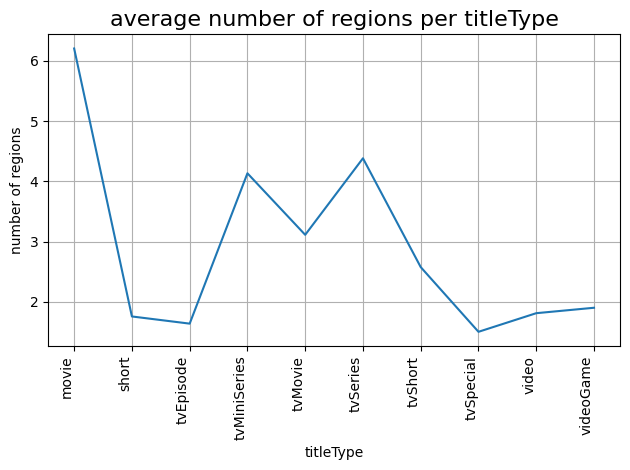

In [49]:
#questo interessante?

y = train_df.groupby("titleType")["numRegions"].mean()
plt.plot(y)
plt.xticks(rotation=90, ha='right')
plt.title('average number of regions per titleType', fontsize=16)
plt.xlabel("titleType")
plt.ylabel("number of regions")
plt.grid(True)
plt.tight_layout()
plt.show()

#insert_name
# plt.savefig('plots/insert_name.png')

Media di numero voti ricevuti per title type

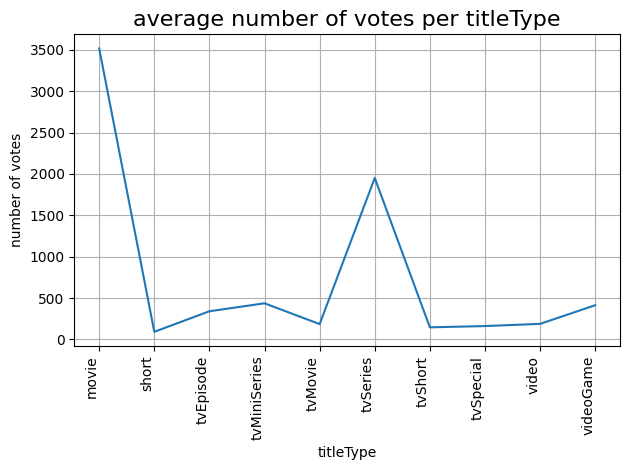

In [ ]:
#film e serie sono i titletype più votati

z = train_df.groupby("titleType")["numVotes"].mean()
plt.plot(z)
plt.xticks(rotation=90, ha='right')
plt.title('average number of votes per titleType', fontsize=16)
plt.xlabel("titleType")
plt.ylabel("number of votes")
plt.grid(True)
plt.tight_layout()
plt.show()

#insert_name
# plt.savefig('plots/insert_name.png')

Numero di awardWins per titleType

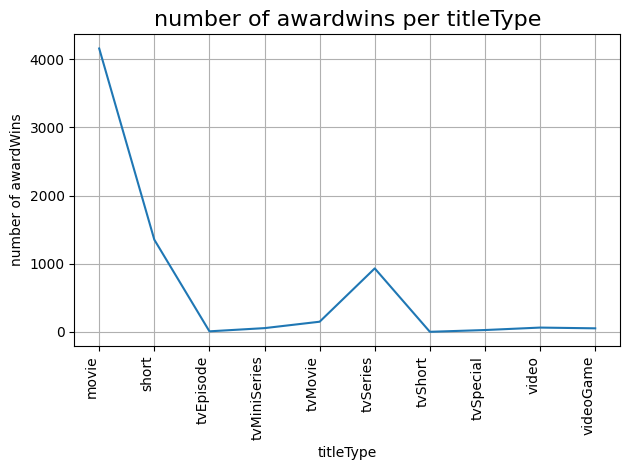

In [ ]:
#hanno vinto più premi i film e le serie tv 

a = train_df.groupby("titleType")["awardWins"].sum()
plt.plot(a)
plt.xticks(rotation=90, ha='right')
plt.title('number of awardwins per titleType', fontsize=16)
plt.xlabel("titleType")
plt.ylabel("number of awardWins")
plt.grid(True)
plt.tight_layout()
plt.show()

#insert_name
# plt.savefig('plots/insert_name.png')

Numero medio di ratingCount per titleType

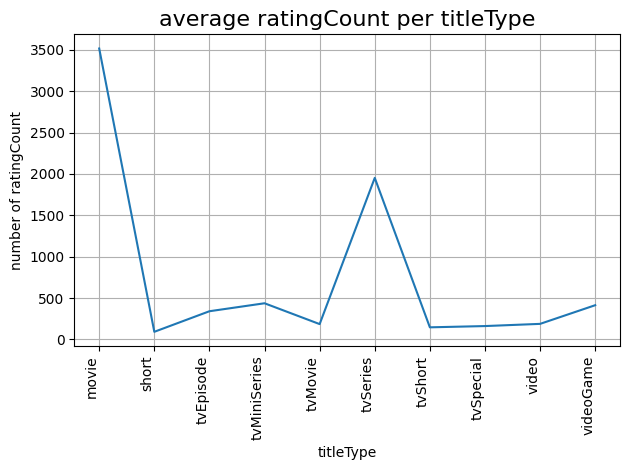

In [52]:
b = train_df.groupby("titleType")["ratingCount"].mean()
plt.plot(b)
plt.xticks(rotation=90, ha='right')
plt.title('average ratingCount per titleType', fontsize=16)
plt.xlabel("titleType")
plt.ylabel("number of ratingCount")
plt.grid(True)
plt.tight_layout()
plt.show()

#insert_name
# plt.savefig('plots/insert_name.png')

Numero medio di userReviewsTotal per titleType

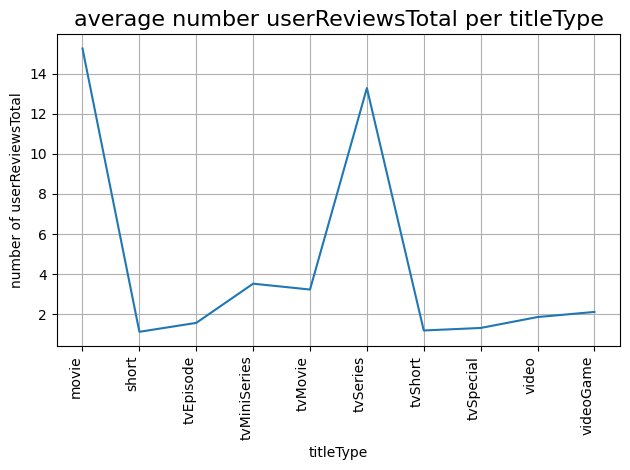

In [53]:
c = train_df.groupby("titleType")["userReviewsTotal"].mean()
plt.plot(c)
plt.xticks(rotation=90, ha='right')
plt.title('average number userReviewsTotal per titleType', fontsize=16)
plt.xlabel("titleType")
plt.ylabel("number of userReviewsTotal")
plt.grid(True)
plt.tight_layout()
plt.show()

#insert_name
# plt.savefig('plots/insert_name.png')

#### DISTRIBUZIONI DI VALORI

Runtime minutes (log)

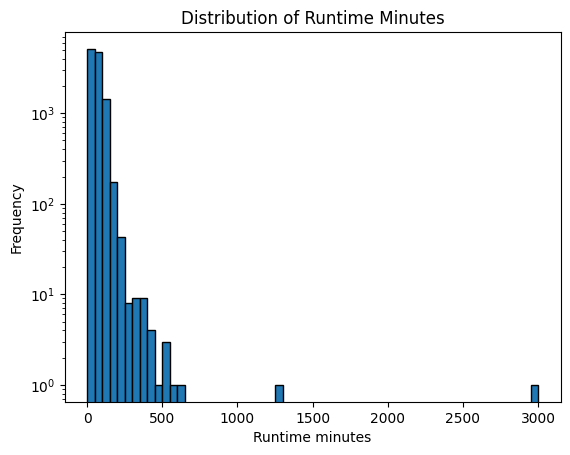

In [54]:
plt.hist(train_df["runtimeMinutes"].dropna(), bins=60, edgecolor='black')
plt.title("Distribution of Runtime Minutes")
plt.xlabel("Runtime minutes")
plt.ylabel("Frequency")
plt.yscale('log')
plt.show()

#insert_name
# plt.savefig('plots/insert_name.png')

User reviews (log)

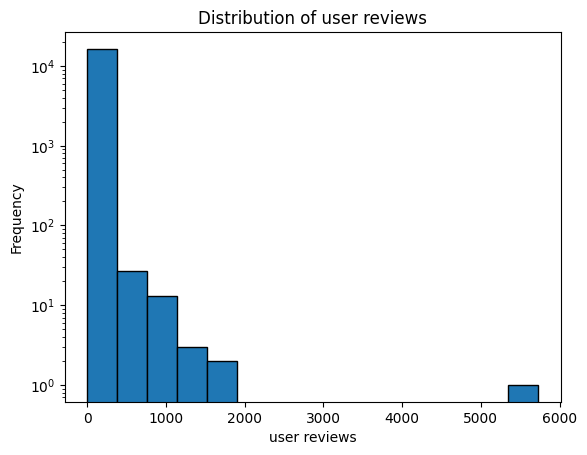

In [ ]:
plt.hist(train_df["userReviewsTotal"].dropna(), bins=15, edgecolor='black')
plt.title("Distribution of user reviews")
plt.xlabel("user reviews")
plt.ylabel("Frequency")
plt.yscale('log')
plt.show()

#insert_name
# plt.savefig('plots/insert_name.png')

numVotes (log)

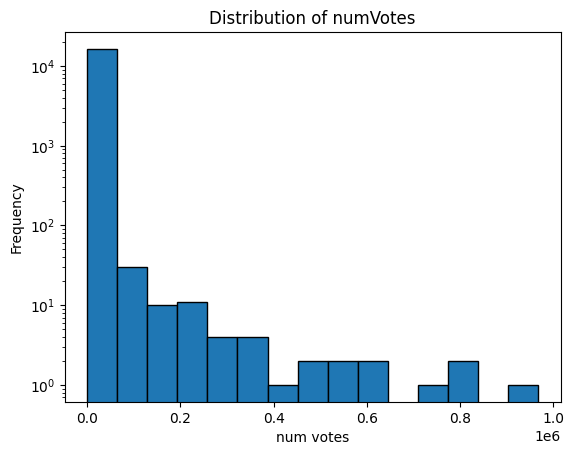

In [56]:
plt.hist(train_df["ratingCount"].dropna(), bins=15, edgecolor='black')
plt.title("Distribution of numVotes")
plt.xlabel("num votes")
plt.ylabel("Frequency")
plt.yscale('log')
plt.show()

#insert_name
# plt.savefig('plots/insert_name.png')

startYear (log)

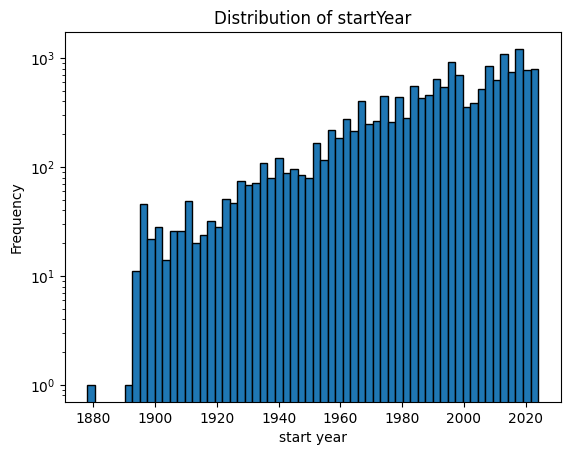

In [ ]:
plt.hist(train_df["startYear"].dropna(), bins=60, edgecolor='black')
plt.title("Distribution of startYear")
plt.xlabel("start year")
plt.ylabel("Frequency")
plt.yscale('log')
plt.show()

#insert_name
# plt.savefig('plots/insert_name.png')

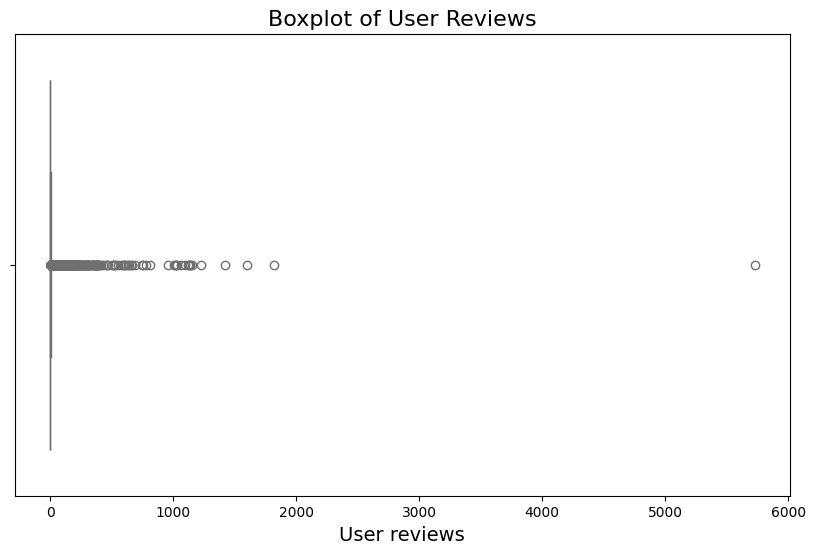

In [58]:
#esperimento boxplot

import seaborn as sns

# Elimina i valori NaN dalla colonna
user_reviews = train_df["userReviewsTotal"].dropna()

# Crea il boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=user_reviews, color='skyblue')

# Titoli e label
plt.title("Boxplot of User Reviews", fontsize=16)
plt.xlabel("User reviews", fontsize=14)
#plt.xscale('log')
plt.show()